In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
file_path = 'change to your xlsx file path'

Mounted at /content/drive


In [ ]:
#   步驟 1：讀取與清洗資料  
df = pd.read_excel(file_path)
df = df.dropna()
df.tail(10)

,creator_handle,videos,subscribers,views,2022-05-31_subscribers,2022-05-31_views,2022-05-31_videos,2022-06-30_subscribers,2022-06-30_views,2022-06-30_videos,...,2025-01-31_videos,2025-02-28_subscribers,2025-02-28_views,2025-02-28_videos,2025-03-31_subscribers,2025-03-31_views,2025-03-31_videos,2025-04-30_subscribers,2025-04-30_views,2025-04-30_videos
64,yoshidajapantv,476,351000,38654765,0.0,0.0,0.0,10200.0,856828.0,0.0,...,0,5000.0,709705.0,459.0,6000,854592,6,3000,593744,6
65,taiwanwalker,790,80300,20044675,0.0,0.0,0.0,2000.0,441015.0,0.0,...,0,2000.0,902866.0,746.0,1200,474144,16,1500,609482,19
67,vietnamjohnny,385,176000,30196008,0.0,0.0,0.0,6220.0,579088.0,0.0,...,0,2000.0,727119.0,358.0,3000,926585,13,1000,214901,7
68,taiwango2020,419,238000,65957429,0.0,0.0,0.0,7400.0,1584258.0,0.0,...,0,4000.0,1625448.0,395.0,2000,1303800,18,2000,82693,-5
69,littlefilm33,129,139000,23543621,0.0,0.0,0.0,3600.0,608327.0,0.0,...,0,3000.0,370813.0,126.0,3000,587689,1,3000,460005,1
70,yuniquecc,292,136000,17651543,0.0,0.0,0.0,4500.0,438983.0,0.0,...,0,3000.0,442100.0,276.0,9000,980016,10,3000,616752,7
72,0323matzu,480,51800,17191840,0.0,0.0,0.0,200.0,64192.0,0.0,...,0,700.0,-117759.0,456.0,500,232925,6,800,258863,8
73,theliupei,1035,1220000,289195448,0.0,0.0,0.0,0.0,1433005.0,0.0,...,0,0.0,344711.0,1018.0,0,556965,7,0,453514,7
74,aikygo,794,277000,64069021,0.0,0.0,0.0,1000.0,490213.0,0.0,...,0,2000.0,586376.0,778.0,1000,577685,7,1000,420318,6
75,黃小四生活點滴,261,73900,15322296,0.0,0.0,0.0,700.0,154072.0,0.0,...,0,1600.0,411042.0,203.0,1000,496386,27,1100,459764,18


In [ ]:
#   步驟 2：擷取要分群的特徵  
features = ['videos', 'subscribers', 'views']
X = df[features].copy()
X

,videos,subscribers,views
0,1589,238000,73434505
1,988,39300,11522637
2,1247,308000,63030571
3,342,199000,44584362
4,299,258000,231688622
...,...,...,...
70,292,136000,17651543
72,480,51800,17191840
73,1035,1220000,289195448
74,794,277000,64069021


In [ ]:
#   步驟 3：標準化資料  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.47485667e-01, -1.15070628e-01, -2.14898466e-01],
       [-2.37313140e-01, -6.82084180e-01, -5.48579675e-01],
       [-1.98602132e-01,  8.46825102e-02, -2.70971677e-01],
       [-3.33866463e-01, -2.26361663e-01, -3.70389665e-01],
       [-3.40293387e-01, -5.79983031e-02,  6.38030493e-01],
       [-1.35080209e-01,  5.12724950e-01,  1.04918111e+00],
       [ 6.20934002e+00, -5.57095788e-01, -7.95424403e-03],
       [-2.57042302e-01,  9.49328239e-01,  1.37517260e-01],
       [-2.32978703e-01,  6.81088310e-01, -1.18742274e-01],
       [-2.04281740e-01,  5.81211740e-01,  1.25562590e+00],
       [ 2.75554096e+00,  8.86548681e-01,  1.31995059e+00],
       [-3.26692222e-01, -6.55260188e-01, -5.57316927e-01],
       [-1.86645065e-01, -2.09239965e-01, -1.02892938e-01],
       [ 2.31852312e-01, -7.16327576e-01, -5.26128474e-01],
       [ 3.80148547e+00, -2.91994837e-01,  8.64874978e-01],
       [-5.10818071e-02,  1.55714850e+00,  1.39500304e+00],
       [-3.07261987e-01, -6.63321033e-03

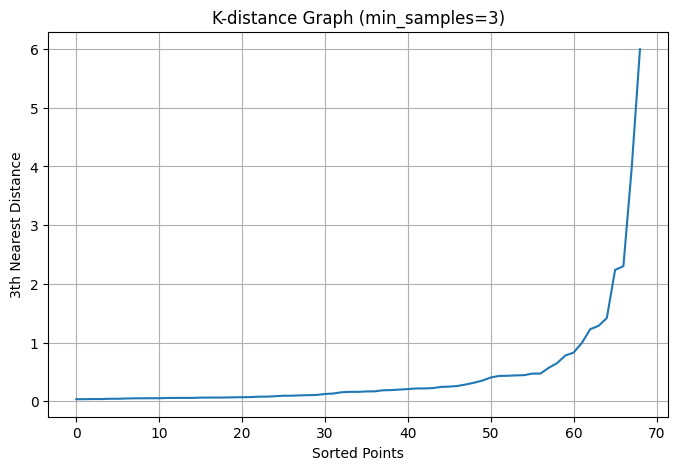

In [ ]:
#   步驟 4：畫 k-distance 圖（推薦 eps）  
k = 3
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

k_distances = np.sort(distances[:, k - 1])  # 第 k 個最近鄰距離
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title("K-distance Graph (min_samples=3)")
plt.xlabel("Sorted Points")
plt.ylabel(f"{k}th Nearest Distance")
plt.grid(True)
plt.show()


In [ ]:
#   步驟 5：使用 DBSCAN（你可以根據上圖調整 eps）  
eps_value = 0.8  #  建議根據 k-distance 圖的轉折點選擇
db = DBSCAN(eps=eps_value, min_samples=k)
labels = db.fit_predict(X_scaled)
df['cluster'] = labels

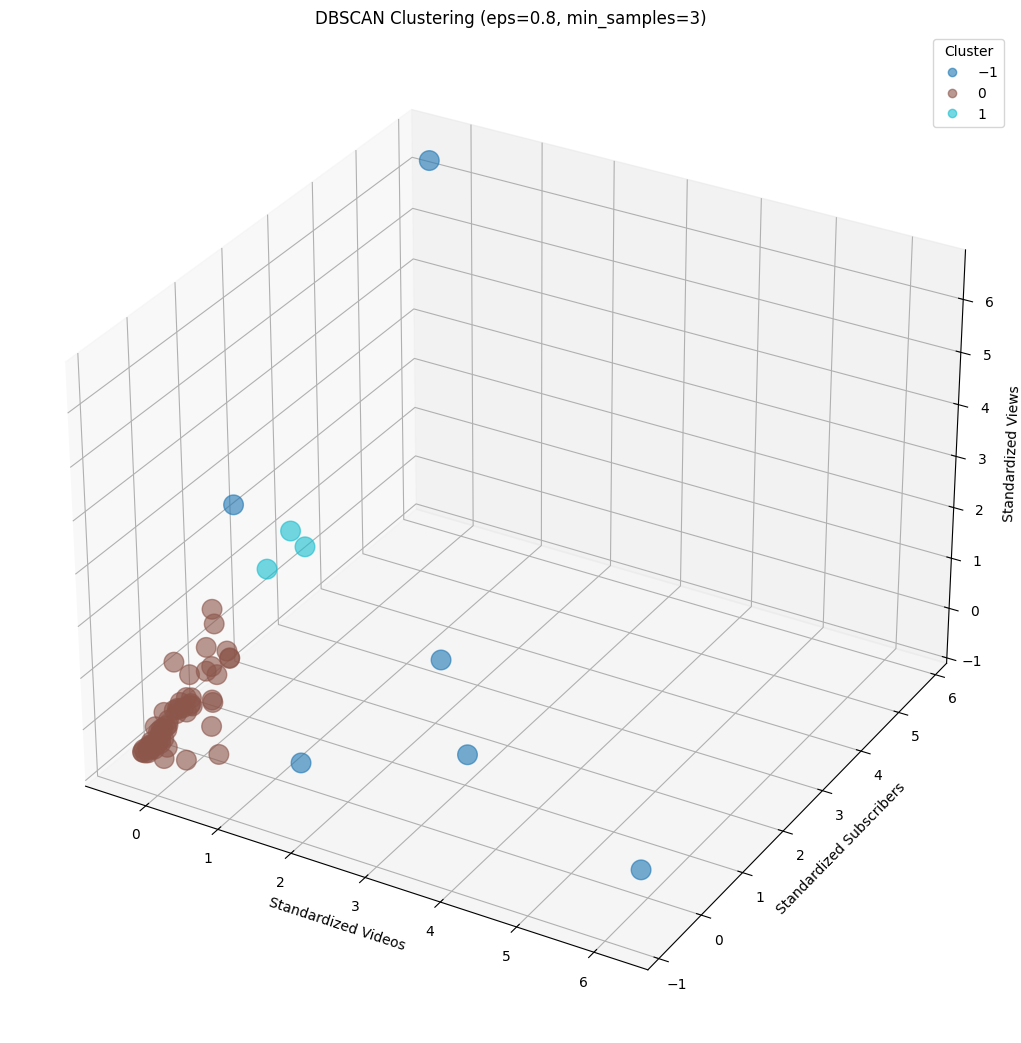

In [ ]:
#   步驟 6：3D 視覺化分群  
fig = plt.figure(figsize=(15, 13))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                     c=labels, cmap='tab10', s=200, alpha=0.6)
ax.set_title(f"DBSCAN Clustering (eps={eps_value}, min_samples={k})")
ax.set_xlabel("Standardized Videos")
ax.set_ylabel("Standardized Subscribers")
ax.set_zlabel("Standardized Views")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

In [ ]:
#   步驟 7：列出各群的特徵中心點  
cluster_centers = df.groupby('cluster')[features].mean()

# 設定 pandas 顯示選項，取消科學記號並設定千分位
pd.options.display.float_format = '{:,.0f}'.format

print("\n各群的中心特徵值：")
display(cluster_centers)

# 重置 pandas 顯示選項為預設值 (可選)
# pd.reset_option('display.float_format')


各群的中心特徵值：


,videos,subscribers,views
cluster,,,
-1,"17,963","668,583","459,761,547"
0,"1,086","201,315","66,477,429"
1,"1,599","1,038,000","356,993,678"


In [ ]:
#   步驟 8：印出每筆資料的分類結果  
pd.set_option('display.max_rows', None)  # 顯示所有行
pd.set_option('display.max_columns', None) # 顯示所有列
pd.set_option('display.width', None) # 不限制顯示寬度
pd.set_option('display.max_colwidth', None) # 顯示完整的列內容

print("\n每筆資料的分類結果：")
display(df[['creator_handle', 'videos', 'subscribers', 'views', 'cluster']])


每筆資料的分類結果：


In [ ]:
df_cluster = df[['creator_handle', 'videos', 'subscribers', 'views', 'cluster']]
display(df_cluster)
output_path = "change to your path.../creator_cluster.csv"
df_cluster.to_csv(output_path, index=False)